In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('../../dataset-normalized.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,1,1102,0,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,False,2,279,1,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,True,1,1373,1,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,False,2,1392,1,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,False,1,591,1,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,False,2,884,1,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,False,1,613,1,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,False,1,155,1,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,False,2,1023,0,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [3]:
job_roles_dict = dict(df.JobRole.value_counts())
job_roles_dict

{'Sales Executive': 326,
 'Research Scientist': 292,
 'Laboratory Technician': 259,
 'Manufacturing Director': 145,
 'Healthcare Representative': 131,
 'Manager': 102,
 'Sales Representative': 83,
 'Research Director': 80,
 'Human Resources': 52}

In [4]:
job_levels_dict = dict(df.JobLevel.value_counts())
job_levels_dict

{1: 543, 2: 534, 3: 218, 4: 106, 5: 69}

In [5]:
job_roles = list(job_roles_dict.keys())
job_roles

['Sales Executive',
 'Research Scientist',
 'Laboratory Technician',
 'Manufacturing Director',
 'Healthcare Representative',
 'Manager',
 'Sales Representative',
 'Research Director',
 'Human Resources']

In [6]:
job_levels = list(job_levels_dict.keys())
job_levels

[1, 2, 3, 4, 5]

In [7]:
for role in job_roles:
    vc = df[df['JobRole'] == role]['JobLevel'].value_counts()
    print(f'Number of people working as a {role} with each job level: \n{vc}')

Number of people working as a Sales Executive with each job level: 
2    233
3     79
4     14
Name: JobLevel, dtype: int64
Number of people working as a Research Scientist with each job level: 
1    234
2     57
3      1
Name: JobLevel, dtype: int64
Number of people working as a Laboratory Technician with each job level: 
1    200
2     56
3      3
Name: JobLevel, dtype: int64
Number of people working as a Manufacturing Director with each job level: 
2    90
3    45
4    10
Name: JobLevel, dtype: int64
Number of people working as a Healthcare Representative with each job level: 
2    78
3    44
4     9
Name: JobLevel, dtype: int64
Number of people working as a Manager with each job level: 
4    47
5    43
3    12
Name: JobLevel, dtype: int64
Number of people working as a Sales Representative with each job level: 
1    76
2     7
Name: JobLevel, dtype: int64
Number of people working as a Research Director with each job level: 
3    28
4    26
5    26
Name: JobLevel, dtype: int64
Number

In [145]:
def plot_salary(s: int, job_role, job_lvl):
    
    job_dict = dict(df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl)]['MonthlyIncome'].describe())
    
    employees = job_dict['count']
    less = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl) & (df['MonthlyIncome'] < s)]['MonthlyIncome'].count()
    more = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl) & (df['MonthlyIncome'] > s)]['MonthlyIncome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    print(f'{less_p}% people working as a {job_role} on job level {job_lvl} earns less than you, {more_p}% of them earns more.')
    
    var = st.variation(df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl)]['MonthlyIncome'])
    
    if var > 0.15 and job_dict['count'] >= 24:
        
        if s <= job_dict['25%']:
            salary = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl) & 
                        (df['MonthlyIncome'] <= job_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to first quartile.'
        elif s <= job_dict['50%']:
            salary = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl) & 
                        (df['MonthlyIncome'] <= job_dict['50%']) & (df['MonthlyIncome'] > job_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to second quartile.'
        elif s <= job_dict['75%']:
            salary = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl) & 
                        (df['MonthlyIncome'] <= job_dict['75%']) & (df['MonthlyIncome'] > job_dict['50%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to third quartile.'
        else:
            salary = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl) & 
                        (df['MonthlyIncome'] > job_dict['75%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to fourth quartile.'
        
        plt.subplots(figsize=(8, 12))
        
        plt.subplot(211)
        sns.histplot(data=salary, bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        plt.subplot(212)
        gen_sal = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl)]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees on your position at your level.'
        sns.histplot(data=gen_sal, bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees working as a {job_role}.')
        
        gen_sal = df[(df['JobRole'] == job_role)]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees on your position.'
        sns.histplot(data=gen_sal, bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)

81.82% people working as a Human Resources on job level 1 earns less than you, 18.18% of them earns more.


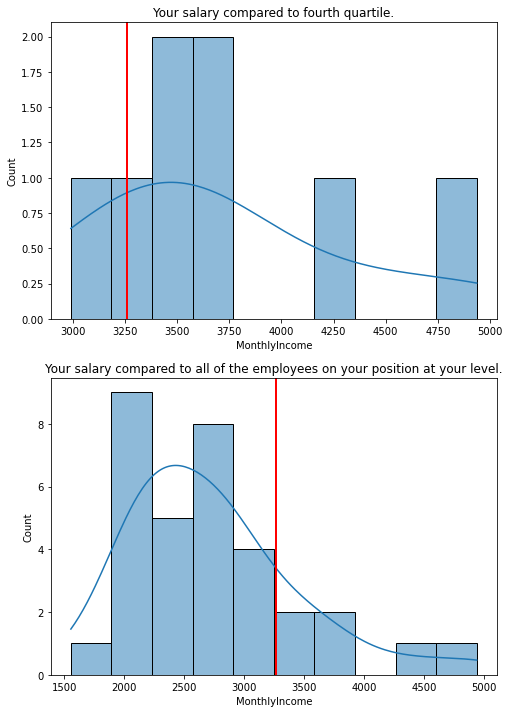

In [148]:
plot_salary(3260, 'Human Resources', 1)